# Predict Magnetic Structure of BaOsO3

In [115]:
import re
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## 1. Data generating

In [116]:
# band image

In [117]:
df = pd.read_csv('output/highsym.csv')
df.drop(df.loc[:, 'wG0.1':'eG11.1'], axis=1, inplace=True) # drop duplicated columns
df.drop(['K', 'SOC'], axis=1, inplace=True) # drop not used conditions
df

,JU,type,N,U,fermi,wG0,wG1,wG2,wG3,wG4,...,eR2,eR3,eR4,eR5,eR6,eR7,eR8,eR9,eR10,eR11
0,0.0,sa,0.2,0.0,3.173033,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.688918,5.688918,6.293314,6.293314,6.690158,6.690158,6.690168,6.690168,6.690168,6.690168
1,0.0,sa,0.2,1.0,3.256043,0.999996,0.999996,1.000000,1.000000,1.000000,...,5.771926,5.771926,6.376320,6.376320,6.773166,6.773166,6.773175,6.773175,6.773176,6.773176
2,0.0,sa,0.2,2.0,3.339508,0.999878,0.999878,0.999878,0.999878,0.980827,...,5.851994,5.851994,6.472061,6.472061,6.855291,6.855291,6.855298,6.855298,6.870630,6.870630
3,0.0,sa,0.2,3.0,3.420834,0.999669,0.999669,0.999669,0.999669,0.947592,...,5.927885,5.927885,6.554303,6.554303,6.934668,6.934668,6.934675,6.934675,6.956366,6.956366
4,0.0,sc,0.2,0.0,3.173033,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.717245,5.717245,5.717267,5.717267,6.690158,6.690158,6.690168,6.690168,6.690168,6.690168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,0.3,sa,11.8,5.0,16.319421,0.999998,0.999998,0.999998,0.999998,0.997594,...,15.521054,15.521054,16.125974,16.125974,16.522331,16.522331,16.522338,16.522338,16.523030,16.523030
7076,0.3,sa,11.8,6.0,18.285991,0.985619,0.985619,0.999987,0.999987,0.999987,...,17.487391,17.487391,18.091994,18.091994,18.488856,18.488856,18.488863,18.488863,18.490115,18.490115
7077,0.3,sa,11.8,7.0,20.270330,0.841188,0.841188,0.999747,0.999747,0.999747,...,19.463776,19.463776,20.050804,20.050804,20.469262,20.469262,20.469268,20.469268,20.471241,20.471241
7078,0.3,sa,11.8,8.0,22.261812,0.697734,0.697734,0.998749,0.998749,0.998749,...,21.411890,21.411890,21.955572,21.955572,22.433997,22.433997,22.434004,22.434004,22.453664,22.453664


<AxesSubplot:>

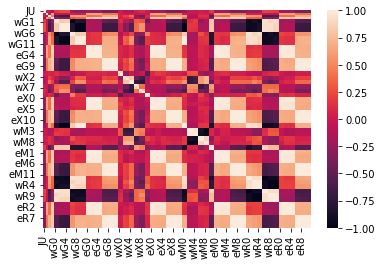

In [118]:
# show correlation

corr = df.corr()
sns.heatmap(corr)

we can find some repeating shape in correlation matrix. <br>
so let's take a look at specific high symmetry point.

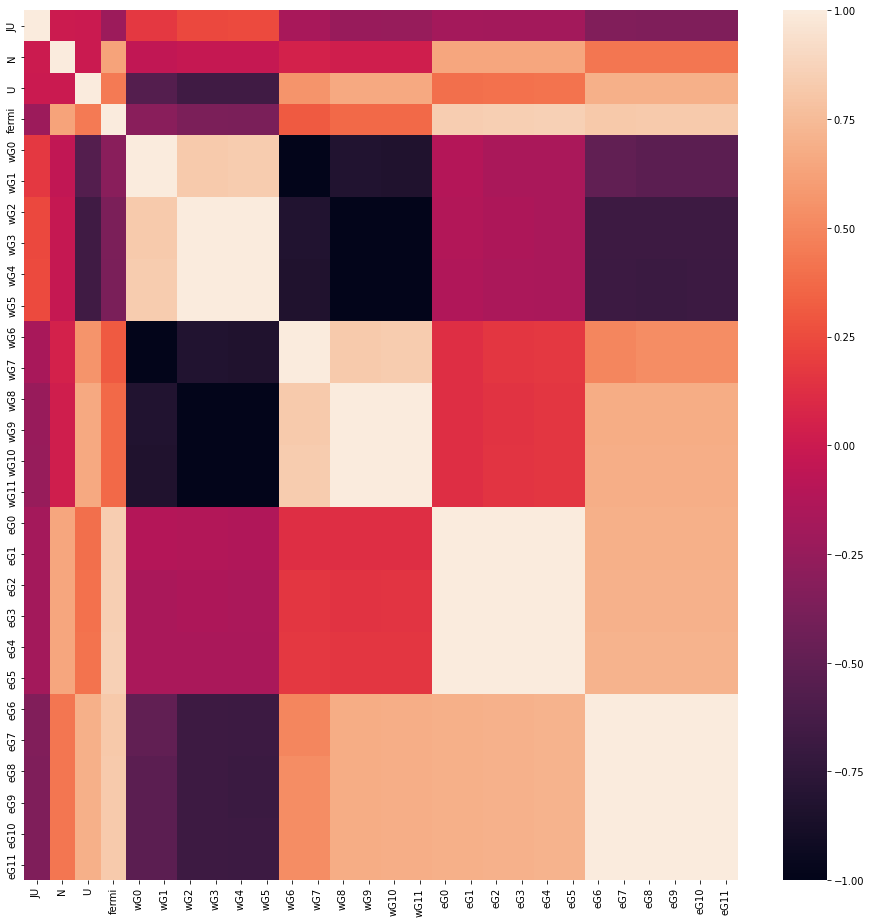

In [119]:
# show correlation of G point and other features

corr = df.loc[:, :'eG11'].corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, ax=ax)
plt.show()

some features are highly correlated -> can be reduced by PCA

## 2. Classification using Random Forest
data scaling is not crucial to RF, so let's run it first

In [120]:
# run Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['type'], axis=1).values
y = df['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

rf = RandomForestClassifier(criterion='gini', random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [121]:
def DrawImportances(rf, feature_names):
    importances = pd.Series(rf.feature_importances_, index=feature_names)
    importances_w = importances.copy()
    for fn in feature_names:
        if not re.match('w', fn): importances_w[fn] = 0

    fig, ax = plt.subplots(figsize=(16, 6))
    importances.plot.bar(ax=ax, color='tab:blue')
    importances_w.plot.bar(ax=ax, color='tab:orange')
    ax.set_xticklabels(feature_names)
    ax.set_title("Feature importances")
    fig.tight_layout()
    plt.show()

Accuracy : 1.000
Precision : 1.000
Recall : 1.000


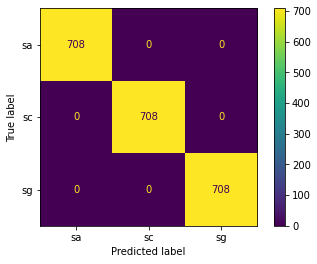

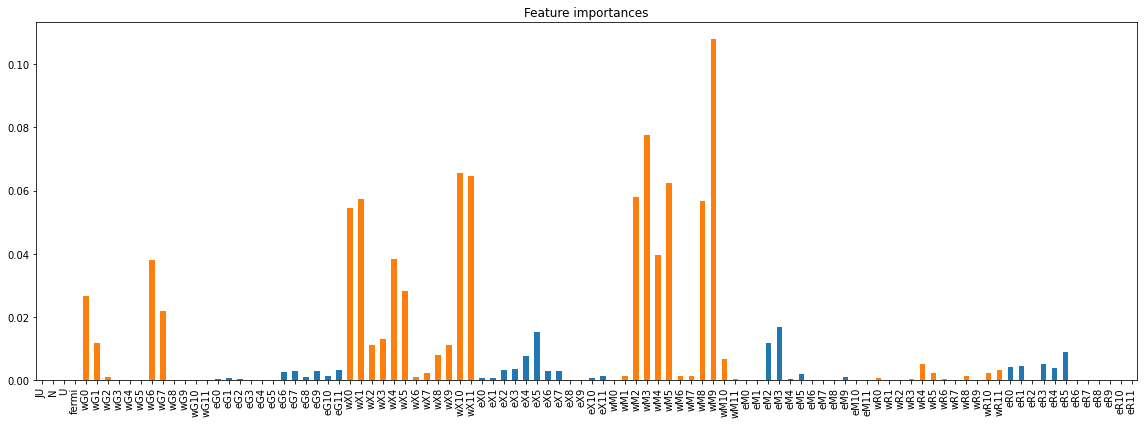

In [122]:
# check performance

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

print('Accuracy : %.3f\nPrecision : %.3f\nRecall : %.3f' % (accuracy_score(y_test, y_pred),\
                                                            precision_score(y_test, y_pred, average='micro'),\
                                                            recall_score(y_test, y_pred, average='micro')))

feature_names = list(df.columns)
feature_names.remove('type')

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
DrawImportances(rf, feature_names)

unfolding weight is considered important in RF. <br>
but RF can't distinguish highly correlated features, so maybe other features correlated with weight are also important too!

## 3. Data preprocessing
scaling

In [123]:
X = df.drop(['type'], axis=1).values
y = df['type'].values

# scailing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc_std = StandardScaler()
sc_mm  = MinMaxScaler()

X_std = sc_std.fit_transform(X)
X_mm  = sc_mm.fit_transform(X)

## 4. PCA (Principal Component Analysis)
data has 103 features -> too many! <br>
for better classification, we should reduce features by using PCA

In [124]:
def DrawVariance(pca, n_components):
    print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
    
    plt.bar(range(n_components), pca.explained_variance_ratio_, alpha=0.5, align='center')
    plt.step(range(n_components), np.cumsum(pca.explained_variance_ratio_), where='mid')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')

    plt.show()

[0.51815865 0.22436776 0.10203907 0.05218872 0.02862444 0.01599775
 0.01432891 0.00958461 0.00782785 0.00657498] 0.9796927299168705


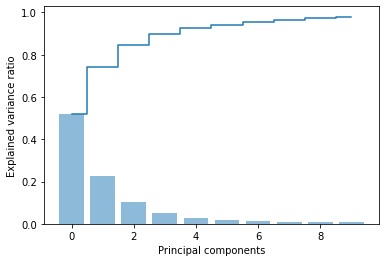

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

DrawVariance(pca, 10)

using 10 principal components can explain original data's variance upto 98%. <br>
so let's find optimal PC num by Scree plot!

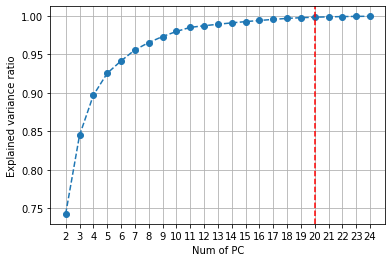

In [126]:
n_list = np.arange(2, 25, 1)
v_list = []

for n in n_list:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_std)
    v_list.append(np.sum(pca.explained_variance_ratio_))
    
fig, ax = plt.subplots()
ax.plot(n_list, v_list, 'o--')
ax.axvline(x=20, color='r', ls='--')
ax.set_xticks(n_list)
ax.set_xlabel('Num of PC')
ax.set_ylabel('Explained variance ratio')
ax.grid(True)
plt.show()

just using 20 PC can explain original data!

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

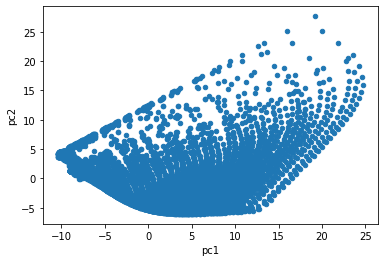

In [148]:
# etc : scatter plot of data with 2 PC

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_pca = pd.DataFrame(X_pca, index=range(len(X_pca)), columns=['pc1', 'pc2'])
X_pca.plot(x='pc1', y='pc2', kind='scatter')

In [127]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_std)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=1)

<AxesSubplot:>

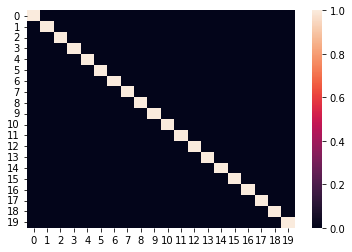

In [137]:
corr = pd.DataFrame(X_pca, index=range(len(X_pca))).corr()
sns.heatmap(corr)

no correlation between PCs

## 5. Classification

In [128]:
# Random Forest

rf = RandomForestClassifier(criterion='gini', random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Accuracy : 1.000
Precision : 1.000
Recall : 1.000


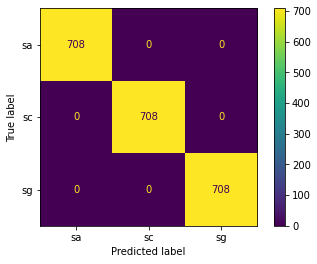

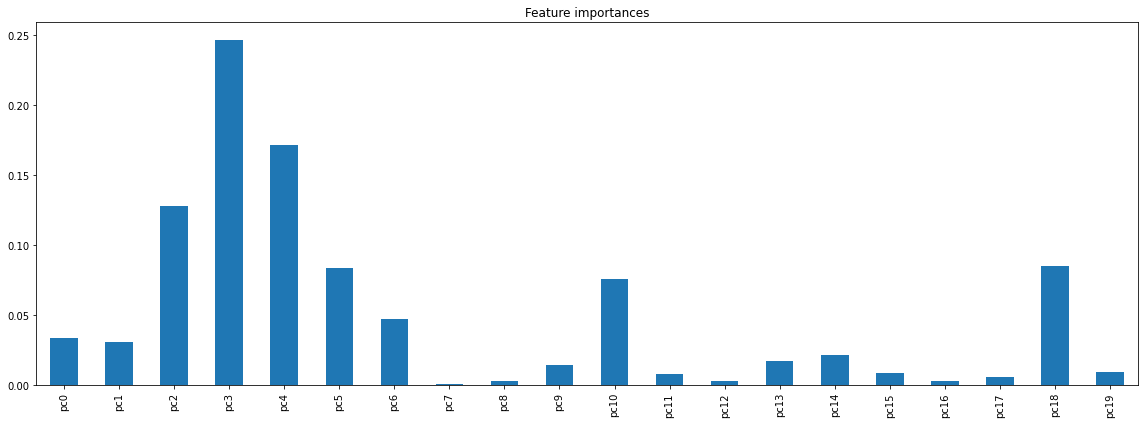

In [131]:
print('Accuracy : %.3f\nPrecision : %.3f\nRecall : %.3f' % (accuracy_score(y_test, y_pred),\
                                                            precision_score(y_test, y_pred, average='micro'),\
                                                            recall_score(y_test, y_pred, average='micro')))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
DrawImportances(rf, ['pc%d' % (i) for i in range(20)])

In [132]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Accuracy : 1.000
Precision : 1.000
Recall : 1.000


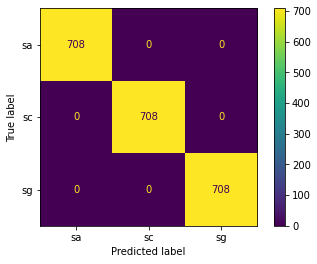

In [138]:
print('Accuracy : %.3f\nPrecision : %.3f\nRecall : %.3f' % (accuracy_score(y_test, y_pred),\
                                                            precision_score(y_test, y_pred, average='micro'),\
                                                            recall_score(y_test, y_pred, average='micro')))

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)